In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_columns", 60)
%matplotlib inline

In [2]:
twn_weather = pd.read_csv('../data/metar-rctp.csv')
twn_weather.head(2)

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,RCTP,2016-12-31 00:00,68.0,62.6,82.86,40.00,17.0,0.0,30.24,M,6.21,M,FEW,SCT,M,M,1500.00,2200.00,M,M,M,M,M,M,M,M,M,68.0,RCTP 310000Z 04017KT 9999 FEW015 SCT022 20/17 ...
1,RCTP,2016-12-31 00:30,69.8,62.6,77.90,40.00,19.0,0.0,30.24,M,6.21,M,BKN,M,M,M,1900.00,M,M,M,M,M,M,M,M,M,M,69.8,RCTP 310030Z 04019KT 9999 BKN019 21/17 Q1024 N...


In [3]:
twn_weather.rename(columns={
    'valid': 'timestamp',
    'tmpf': 'air_temp',
    'dwpf': 'dewpoint_temp',
    'relh': 'rel_humidity',
    'drct': 'wind_dir',
    'sknt': 'wind_speed',
    'p01i': 'precipitation',
    'alti': 'altimeter_pressure',
    'mslp': 'sealevel_pressure',
    'vsby': 'visibility',
    'gust': 'gust_speed',
    'skyc1': 'sky_level_1_coverage',
    'skyc2': 'sky_level_2_coverage',
    'skyc3': 'sky_level_3_coverage',
    'skyc4': 'sky_level_4_coverage',
    'skyl1': 'sky_level_1_altitude',
    'skyl2': 'sky_level_2_altitude',
    'skyl3': 'sky_level_3_altitude',
    'skyl4': 'sky_level_4_altitude',
    'wxcodes': 'weather_codes',
    'feel': 'apparent_temp'
}, inplace=True)

In [4]:
twn_weather.shape

(3012, 29)

In [5]:
twn_weather.columns

Index(['station', 'timestamp', 'air_temp', 'dewpoint_temp', 'rel_humidity',
       'wind_dir', 'wind_speed', 'precipitation', 'altimeter_pressure',
       'sealevel_pressure', 'visibility', 'gust_speed', 'sky_level_1_coverage',
       'sky_level_2_coverage', 'sky_level_3_coverage', 'sky_level_4_coverage',
       'sky_level_1_altitude', 'sky_level_2_altitude', 'sky_level_3_altitude',
       'sky_level_4_altitude', 'weather_codes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'apparent_temp', 'metar'],
      dtype='object')

In [6]:
twn_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   station               3012 non-null   object 
 1   timestamp             3012 non-null   object 
 2   air_temp              3012 non-null   float64
 3   dewpoint_temp         3012 non-null   float64
 4   rel_humidity          3012 non-null   float64
 5   wind_dir              3012 non-null   object 
 6   wind_speed            3012 non-null   float64
 7   precipitation         3012 non-null   float64
 8   altimeter_pressure    3012 non-null   float64
 9   sealevel_pressure     3012 non-null   object 
 10  visibility            3012 non-null   float64
 11  gust_speed            3012 non-null   object 
 12  sky_level_1_coverage  3012 non-null   object 
 13  sky_level_2_coverage  3012 non-null   object 
 14  sky_level_3_coverage  3012 non-null   object 
 15  sky_level_4_coverage 

## Handling null values

In [7]:
twn_weather.replace('M', np.NaN, inplace=True)

In [8]:
twn_weather.isnull().sum()

station                    0
timestamp                  0
air_temp                   0
dewpoint_temp              0
rel_humidity               0
wind_dir                  56
wind_speed                 0
precipitation              0
altimeter_pressure         0
sealevel_pressure       3012
visibility                 0
gust_speed              2896
sky_level_1_coverage      69
sky_level_2_coverage     592
sky_level_3_coverage    1478
sky_level_4_coverage    2986
sky_level_1_altitude      70
sky_level_2_altitude     592
sky_level_3_altitude    1478
sky_level_4_altitude    2986
weather_codes           2233
ice_accretion_1hr       3012
ice_accretion_3hr       3012
ice_accretion_6hr       3012
peak_wind_gust          3012
peak_wind_drct          3012
peak_wind_time          3012
apparent_temp              0
metar                      0
dtype: int64

In [9]:
twn_weather.isnull().sum() / twn_weather.shape[0] * 100

station                   0.000000
timestamp                 0.000000
air_temp                  0.000000
dewpoint_temp             0.000000
rel_humidity              0.000000
wind_dir                  1.859230
wind_speed                0.000000
precipitation             0.000000
altimeter_pressure        0.000000
sealevel_pressure       100.000000
visibility                0.000000
gust_speed               96.148738
sky_level_1_coverage      2.290837
sky_level_2_coverage     19.654714
sky_level_3_coverage     49.070385
sky_level_4_coverage     99.136786
sky_level_1_altitude      2.324037
sky_level_2_altitude     19.654714
sky_level_3_altitude     49.070385
sky_level_4_altitude     99.136786
weather_codes            74.136786
ice_accretion_1hr       100.000000
ice_accretion_3hr       100.000000
ice_accretion_6hr       100.000000
peak_wind_gust          100.000000
peak_wind_drct          100.000000
peak_wind_time          100.000000
apparent_temp             0.000000
metar               

In [10]:
# Drop features with 100% NaN values
twn_weather.drop(['sealevel_pressure', 
                  'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
                  'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time'], axis=1, inplace=True)

twn_weather.drop(['metar'], axis=1, inplace=True)
# twn_weather.drop(['precipitation'], axis=1, inplace=True)

# twn_weather.drop(['sky_level_2_coverage', 'sky_level_3_coverage', 'sky_level_4_coverage',
#                   'sky_level_2_altitude', 'sky_level_3_altitude', 'sky_level_4_altitude'], 
#                   axis=1, inplace=True)

# twn_weather.timestamp = pd.to_datetime(twn_weather.timestamp)

# twn_weather.wind_dir = pd.to_numeric(twn_weather.wind_dir, errors='coerce').astype('Int64')

# twn_weather.gust_speed = pd.to_numeric(twn_weather.gust_speed, errors='coerce').astype('Int64')
# twn_weather.gust_speed = twn_weather.gust_speed.fillna(0)

# twn_weather.wind_dir = twn_weather.wind_dir.fillna(method='ffill')

# twn_weather.sky_level_1_coverage = twn_weather.sky_level_1_coverage.fillna(method='ffill')
# twn_weather.sky_level_1_altitude = twn_weather.sky_level_1_altitude.fillna(method='ffill')

In [11]:
twn_weather.isnull().sum() / twn_weather.shape[0] * 100

station                  0.000000
timestamp                0.000000
air_temp                 0.000000
dewpoint_temp            0.000000
rel_humidity             0.000000
wind_dir                 1.859230
wind_speed               0.000000
precipitation            0.000000
altimeter_pressure       0.000000
visibility               0.000000
gust_speed              96.148738
sky_level_1_coverage     2.290837
sky_level_2_coverage    19.654714
sky_level_3_coverage    49.070385
sky_level_4_coverage    99.136786
sky_level_1_altitude     2.324037
sky_level_2_altitude    19.654714
sky_level_3_altitude    49.070385
sky_level_4_altitude    99.136786
weather_codes           74.136786
apparent_temp            0.000000
dtype: float64

## station
three or four character site identifier

In [12]:
twn_weather.station.value_counts()

RCTP    3012
Name: station, dtype: int64

## timestamp
timestamp of observation

In [13]:
twn_weather.timestamp = pd.to_datetime(twn_weather.timestamp)

In [14]:
twn_weather.timestamp.sort_values()

0      2016-12-31 00:00:00
1      2016-12-31 00:30:00
2      2016-12-31 01:00:00
3      2016-12-31 01:30:00
4      2016-12-31 02:00:00
               ...        
3007   2017-02-27 22:47:00
3008   2017-02-27 23:00:00
3009   2017-02-27 23:20:00
3010   2017-02-27 23:24:00
3011   2017-02-27 23:30:00
Name: timestamp, Length: 3012, dtype: datetime64[ns]

## air_temp
Air Temperature in Fahrenheit, typically @ 2 meters

In [15]:
twn_weather.air_temp.dtype

dtype('float64')

In [16]:
twn_weather.air_temp.value_counts().sort_index()

48.2      1
50.0     21
51.8     74
53.6    156
55.4    144
57.2    267
59.0    304
60.8    294
62.6    392
64.4    395
66.2    262
68.0    293
69.8    195
71.6     99
73.4     63
75.2     16
77.0     18
78.8     10
80.6      8
Name: air_temp, dtype: int64

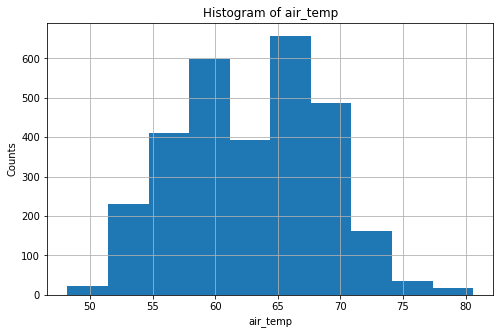

In [17]:
plt.figure(figsize=(8, 5))
twn_weather.air_temp.hist()
plt.xlabel('air_temp')
plt.ylabel('Counts')
plt.title('Histogram of air_temp');

## dewpoint_temp
Dew Point Temperature in Fahrenheit, typically @ 2 meters

In [18]:
twn_weather.dewpoint_temp.dtype

dtype('float64')

In [19]:
twn_weather.dewpoint_temp.value_counts().sort_index()

35.6      8
37.4     46
39.2     36
41.0     29
42.8     47
44.6     53
46.4    123
48.2    125
50.0    205
51.8    319
53.6    260
55.4    204
57.2    244
59.0    214
60.8    331
62.6    352
64.4    198
66.2    168
68.0     50
Name: dewpoint_temp, dtype: int64

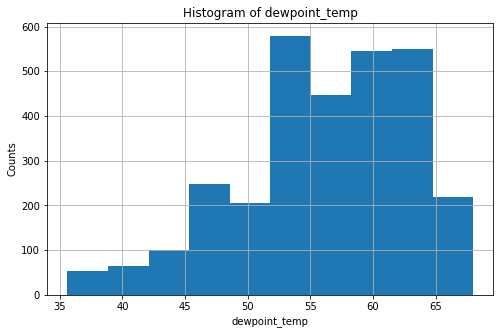

In [20]:
plt.figure(figsize=(8, 5))
twn_weather.dewpoint_temp.hist()
plt.xlabel('dewpoint_temp')
plt.ylabel('Counts')
plt.title('Histogram of dewpoint_temp');

## rel_humidity
Relative Humidity in %

In [21]:
twn_weather.rel_humidity.dtype

dtype('float64')

In [22]:
twn_weather.rel_humidity.value_counts().sort_index()

42.85       1
43.13       2
44.25       1
44.52       1
44.80       1
         ... 
93.88     113
93.92      36
93.97      82
94.01      26
100.00    125
Name: rel_humidity, Length: 168, dtype: int64

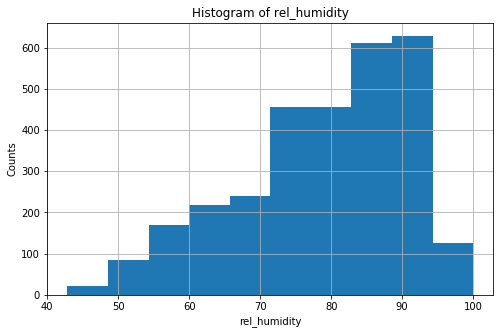

In [23]:
plt.figure(figsize=(8, 5))
twn_weather.rel_humidity.hist()
plt.xlabel('rel_humidity')
plt.ylabel('Counts')
plt.title('Histogram of rel_humidity');

## wind_dir
Wind Direction in degrees from north

In [24]:
twn_weather.wind_dir.dtype

dtype('O')

In [25]:
twn_weather.wind_dir = pd.to_numeric(twn_weather.wind_dir, errors='coerce').astype('Int64')

In [26]:
twn_weather.wind_dir.isnull().sum()

56

In [27]:
twn_weather.wind_dir.value_counts(dropna=False).sort_index()

0        8
10     129
20     228
30     377
40     481
50     495
60     357
70     204
80      47
90      12
100     21
110      7
120      8
130     18
140     16
150     24
160     21
170     26
180     14
190     16
200     12
210     14
220     31
230     39
240     32
250      9
260     14
270      9
280     14
290     34
300     25
310     37
320     32
330     21
340     32
350     41
360     51
NaN     56
Name: wind_dir, dtype: Int64

In [28]:
twn_weather.wind_dir[twn_weather.wind_dir.isnull()].index

Int64Index([ 107,  239,  245,  289,  291,  293,  294,  295,  296,  300,  304,
             305,  361,  365,  369,  370,  372,  399,  923,  984, 1451, 1452,
            1496, 1512, 1519, 1762, 1807, 1809, 1811, 1814, 1821, 2308, 2326,
            2331, 2362, 2375, 2377, 2378, 2380, 2395, 2530, 2532, 2533, 2535,
            2537, 2588, 2659, 2660, 2673, 2680, 2681, 2682, 2685, 2695, 2696,
            2704],
           dtype='int64')

In [29]:
twn_weather.loc[236:242, ['timestamp', 'wind_dir']]

,timestamp,wind_dir
236,2017-01-04 14:00:00,80
237,2017-01-04 14:30:00,140
238,2017-01-04 15:00:00,120
239,2017-01-04 15:30:00,<NA>
240,2017-01-04 16:00:00,190
241,2017-01-04 16:30:00,130
242,2017-01-04 17:00:00,170


Text(0.5, 1.0, 'Histogram of wind_dir')

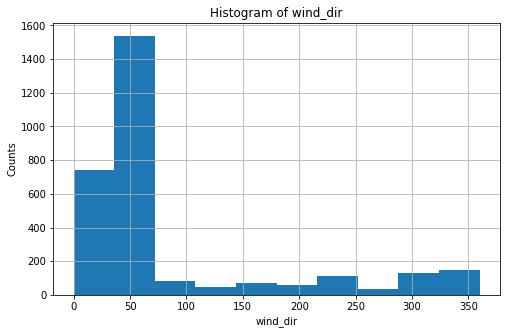

In [30]:
plt.figure(figsize=(8, 5))
twn_weather.wind_dir.hist()
plt.xlabel('wind_dir')
plt.ylabel('Counts')
plt.title('Histogram of wind_dir')

## wind_speed
Wind Speed in knots

In [31]:
twn_weather.wind_speed.dtype

dtype('float64')

In [32]:
twn_weather.wind_speed.isnull().sum()

0

In [33]:
twn_weather.wind_speed.min()

0.0

In [34]:
twn_weather.wind_speed.max()

30.0

Text(0.5, 1.0, 'Histogram of wind_speed')

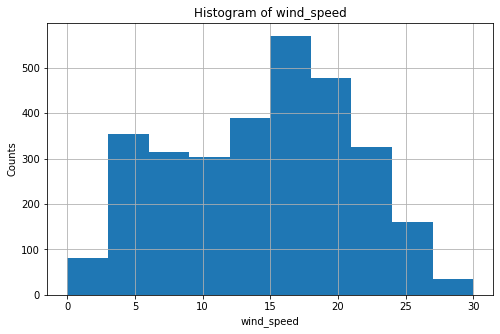

In [35]:
plt.figure(figsize=(8, 5))
twn_weather.wind_speed.hist()
plt.xlabel('wind_speed')
plt.ylabel('Counts')
plt.title('Histogram of wind_speed')

## precipitation
One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.

In [36]:
twn_weather.precipitation.dtype

dtype('float64')

In [37]:
twn_weather.precipitation.isnull().sum()

0

In [38]:
twn_weather.precipitation.min()

0.0

In [39]:
twn_weather.precipitation.max()

0.0

In [40]:
# Handling precipitation
twn_weather.drop(['precipitation'], axis=1, inplace=True)

## altimeter_pressure
Pressure altimeter in inches

In [41]:
twn_weather.altimeter_pressure.dtype

dtype('float64')

In [42]:
twn_weather.altimeter_pressure.isnull().sum()

0

In [43]:
twn_weather.altimeter_pressure.min()

29.85

In [44]:
twn_weather.altimeter_pressure.max()

30.42

Text(0.5, 1.0, 'Histogram of altimeter_pressure')

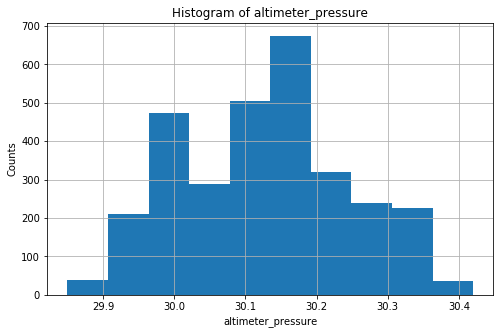

In [45]:
plt.figure(figsize=(8, 5))
twn_weather.altimeter_pressure.hist()
plt.xlabel('altimeter_pressure')
plt.ylabel('Counts')
plt.title('Histogram of altimeter_pressure')

## visibility
Visibility in miles

In [46]:
twn_weather.visibility.min()

0.19

In [47]:
twn_weather.visibility.max()

6.21

Text(0.5, 1.0, 'Histogram of visibility')

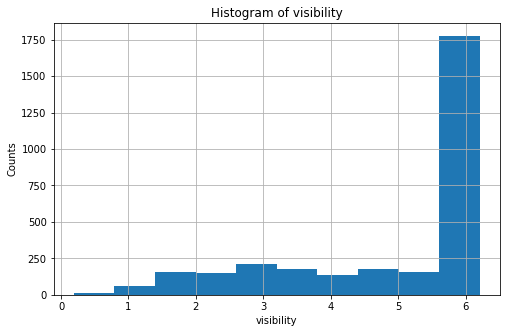

In [48]:
plt.figure(figsize=(8, 5))
twn_weather.visibility.hist()
plt.xlabel('visibility')
plt.ylabel('Counts')
plt.title('Histogram of visibility')

## gust_speed
Wind Gust in knots

In [49]:
twn_weather.gust_speed.isnull().sum()

2896

In [50]:
twn_weather.gust_speed.value_counts(dropna=False).sort_index()

14.00       1
20.00       1
22.00       2
23.00       1
25.00       3
26.00       2
27.00       3
28.00       7
29.00       9
30.00       6
31.00      12
32.00       7
33.00      12
34.00       6
35.00       8
36.00      10
37.00       9
38.00      10
39.00       6
40.00       1
NaN      2896
Name: gust_speed, dtype: int64

In [51]:
twn_weather.gust_speed = pd.to_numeric(twn_weather.gust_speed, errors='coerce').astype('Int64')
twn_weather.gust_speed = twn_weather.gust_speed.fillna(0)

## sky_level_1_coverage
Sky Level 1 Coverage

In [52]:
twn_weather.sky_level_1_coverage.value_counts(dropna=False).sort_index()

BKN     134
FEW    1965
NSC       1
SCT     839
VV        4
NaN      69
Name: sky_level_1_coverage, dtype: int64

In [53]:
twn_weather.sky_level_1_coverage[twn_weather.sky_level_1_coverage.isnull()].index

Int64Index([  37,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
              58,   59,  544,  545,  546,  547, 1161, 1162, 1163, 1164, 1165,
            1341, 1342, 1343, 1360, 1361, 1362, 1363, 1366, 1367, 1370, 1371,
            1933, 1934, 1937, 1938, 2261, 2262, 2263, 2264, 2265, 2266, 2267,
            2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278,
            2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289,
            2497, 2498, 2499],
           dtype='int64')

In [54]:
twn_weather.loc[540:550, ['timestamp', 'sky_level_1_coverage']]

,timestamp,sky_level_1_coverage
540,2017-01-10 05:00:00,FEW
541,2017-01-10 05:30:00,FEW
542,2017-01-10 06:00:00,FEW
543,2017-01-10 06:30:00,FEW
544,2017-01-10 07:00:00,NaN
545,2017-01-10 07:30:00,NaN
546,2017-01-10 08:00:00,NaN
547,2017-01-10 08:30:00,NaN
548,2017-01-10 09:00:00,NSC
549,2017-01-10 09:30:00,FEW


In [55]:
# Handling NaN
# twn_weather.sky_level_1_coverage = twn_weather.sky_level_1_coverage.fillna(method='ffill')

## sky_level_2_coverage
Sky Level 2 Coverage

In [56]:
twn_weather.sky_level_2_coverage.value_counts(dropna=False).sort_index()

BKN    1874
FEW       4
OVC      69
SCT     473
NaN     592
Name: sky_level_2_coverage, dtype: int64

In [57]:
twn_weather.sky_level_2_coverage[twn_weather.sky_level_2_coverage.isnull()].index

Int64Index([   1,    2,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537],
           dtype='int64', length=592)

In [58]:
twn_weather.loc[0:50, ['timestamp', 'sky_level_2_coverage']]

,timestamp,sky_level_2_coverage
0,2016-12-31 00:00:00,SCT
1,2016-12-31 00:30:00,NaN
2,2016-12-31 01:00:00,NaN
3,2016-12-31 01:30:00,BKN
4,2016-12-31 02:00:00,NaN
5,2016-12-31 03:00:00,NaN
6,2016-12-31 03:30:00,NaN
7,2016-12-31 04:00:00,NaN
8,2016-12-31 04:30:00,NaN
9,2016-12-31 05:00:00,NaN


In [59]:
# Handling NaN (DROP)
# twn_weather.drop(columns=['sky_level_2_coverage'], axis=1, inplace=True)

## sky_level_1_altitude

In [60]:
twn_weather.sky_level_1_altitude.value_counts(dropna=False).sort_index()

100.00      21
1000.00    118
1100.00      9
1200.00    315
1300.00     13
1400.00     30
1500.00    414
1600.00     73
1800.00     17
1900.00      3
200.00      40
2000.00    506
2100.00      3
2200.00      9
2300.00      8
2400.00      2
2500.00    179
2600.00     23
2700.00      1
2800.00     11
300.00     129
3000.00     42
3200.00      3
3300.00      5
3500.00     16
3600.00     10
3700.00      1
3800.00      8
3900.00      1
400.00     136
4000.00     16
4200.00     11
4500.00      1
500.00     228
600.00     228
700.00      73
800.00     208
900.00      31
NaN         70
Name: sky_level_1_altitude, dtype: int64

In [61]:
twn_weather.sky_level_1_altitude[twn_weather.sky_level_1_altitude.isnull()].index

Int64Index([  37,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
              58,   59,  544,  545,  546,  547,  548, 1161, 1162, 1163, 1164,
            1165, 1341, 1342, 1343, 1360, 1361, 1362, 1363, 1366, 1367, 1370,
            1371, 1933, 1934, 1937, 1938, 2261, 2262, 2263, 2264, 2265, 2266,
            2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277,
            2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288,
            2289, 2497, 2498, 2499],
           dtype='int64')

In [62]:
twn_weather.loc[34:40, ['timestamp', 'sky_level_1_altitude']]

,timestamp,sky_level_1_altitude
34,2016-12-31 17:30:00,2500.00
35,2016-12-31 18:00:00,3000.00
36,2016-12-31 18:30:00,4000.00
37,2016-12-31 19:00:00,NaN
38,2016-12-31 19:30:00,2300.00
39,2016-12-31 20:00:00,2300.00
40,2016-12-31 20:30:00,2300.00


In [63]:
twn_weather.drop(['sky_level_2_coverage', 'sky_level_3_coverage', 'sky_level_4_coverage',
                  'sky_level_2_altitude', 'sky_level_3_altitude', 'sky_level_4_altitude'], 
                  axis=1, inplace=True)

## weather_codes
Present Weather Codes (space seperated)

In [64]:
twn_weather.weather_codes.value_counts(dropna=False)

NaN         2233
BR           318
-RA          250
-DZ           52
-RA BR        48
RA            24
-DZ BR        20
-SHRA BR      17
-SHRA         16
SHRA BR        9
FG             9
SHRA           4
HZ             4
-TSRA          2
TSRA           2
VCSH           2
+SHRA          1
+TSRA          1
Name: weather_codes, dtype: int64

In [65]:
twn_weather.weather_codes = twn_weather.weather_codes.fillna('')

In [66]:
# Count Vectorize

# Instantiate a CountVectorizer
cvec = CountVectorizer(token_pattern=r'(?u)[\w+-]+')

# Fit the vectorizer on our corpus
cvec.fit(twn_weather['weather_codes'])

# Transform the corpus
X_weather_codes = cvec.transform(twn_weather['weather_codes'])

# Convert X_train into a DataFrame
X_weather_codes_df = pd.DataFrame(X_weather_codes.toarray(),
                                  columns=list(map(lambda x: "weather_codes_" + x.upper(), cvec.get_feature_names())))
X_weather_codes_df

,weather_codes_+SHRA,weather_codes_+TSRA,weather_codes_-DZ,weather_codes_-RA,weather_codes_-SHRA,weather_codes_-TSRA,weather_codes_BR,weather_codes_FG,weather_codes_HZ,weather_codes_RA,weather_codes_SHRA,weather_codes_TSRA,weather_codes_VCSH
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,0,0,0,0,0,0,1,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,0,0,0
3010,0,0,0,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

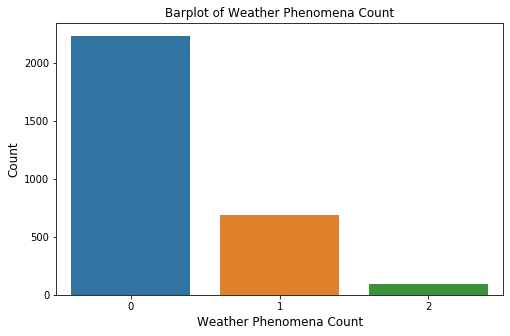

In [67]:
X_weather_num_series = X_weather_codes_df.sum(axis=1).value_counts()

# Plot barchart

plt.figure(figsize=(8, 5))
sns.barplot(X_weather_num_series.index, X_weather_num_series.values)

plt.title('Barplot of Weather Phenomena Count', fontsize=12)
plt.xlabel('Weather Phenomena Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.savefig('../images/9_bar_cool.png', transparent=True)

Text(0.5, 0, 'Count')

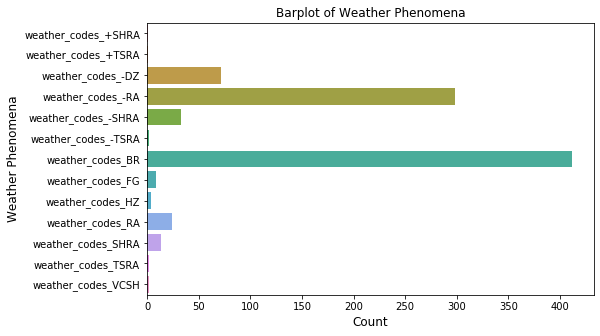

In [68]:
X_weather_series = X_weather_codes_df.sum(axis=0)

# Plot barchart
plt.figure(figsize=(8, 5))
sns.barplot(X_weather_series.values, X_weather_series.index)

plt.title('Barplot of Weather Phenomena', fontsize=12)
plt.ylabel('Weather Phenomena', fontsize=12)
plt.xlabel('Count', fontsize=12)
# plt.savefig('../images/11_bar_weather_phenomena.png', transparent=True)

In [69]:
twn_weather = pd.concat([twn_weather, X_weather_codes_df], axis=1)

## apparent_temp
Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit

In [70]:
twn_weather.apparent_temp.min()

43.05

In [71]:
twn_weather.apparent_temp.max()

82.75

Text(0.5, 1.0, 'Histogram of apparent_temp')

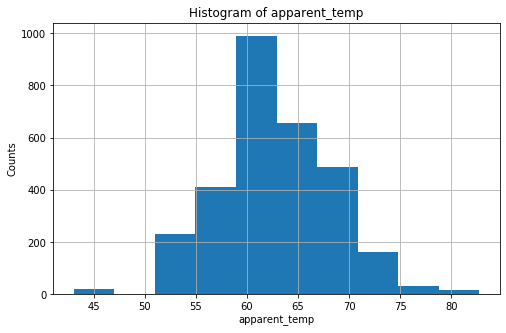

In [72]:
plt.figure(figsize=(8, 5))
twn_weather.apparent_temp.hist()
plt.xlabel('apparent_temp')
plt.ylabel('Counts')
plt.title('Histogram of apparent_temp')

In [73]:
twn_weather.isnull().sum()

station                  0
timestamp                0
air_temp                 0
dewpoint_temp            0
rel_humidity             0
wind_dir                56
wind_speed               0
altimeter_pressure       0
visibility               0
gust_speed               0
sky_level_1_coverage    69
sky_level_1_altitude    70
weather_codes            0
apparent_temp            0
weather_codes_+SHRA      0
weather_codes_+TSRA      0
weather_codes_-DZ        0
weather_codes_-RA        0
weather_codes_-SHRA      0
weather_codes_-TSRA      0
weather_codes_BR         0
weather_codes_FG         0
weather_codes_HZ         0
weather_codes_RA         0
weather_codes_SHRA       0
weather_codes_TSRA       0
weather_codes_VCSH       0
dtype: int64

In [74]:
twn_weather.wind_dir = twn_weather.wind_dir.fillna(method='ffill')
twn_weather.sky_level_1_coverage = twn_weather.sky_level_1_coverage.fillna(method='ffill')
twn_weather.sky_level_1_altitude = twn_weather.sky_level_1_altitude.fillna(method='ffill')

In [75]:
# twn_weather.loc[(twn_weather.valid.dt.minute != 0) & (twn_weather.valid.dt.minute != 30)].index.tolist()

In [76]:
# twn_weather.loc[75:78]

In [77]:
# start_dt = dt.datetime(2016, 12, 31, 0, 0, 0)
# + dt.timedelta(minutes=30)

In [78]:
twn_weather_resampled = twn_weather.set_index('timestamp').resample('30Min').first()

In [79]:
twn_weather_resampled.reset_index(inplace=True)

In [80]:
twn_weather_resampled.isnull().sum()

timestamp                0
station                 98
air_temp                98
dewpoint_temp           98
rel_humidity            98
wind_dir                98
wind_speed              98
altimeter_pressure      98
visibility              98
gust_speed              98
sky_level_1_coverage    98
sky_level_1_altitude    98
weather_codes           98
apparent_temp           98
weather_codes_+SHRA     98
weather_codes_+TSRA     98
weather_codes_-DZ       98
weather_codes_-RA       98
weather_codes_-SHRA     98
weather_codes_-TSRA     98
weather_codes_BR        98
weather_codes_FG        98
weather_codes_HZ        98
weather_codes_RA        98
weather_codes_SHRA      98
weather_codes_TSRA      98
weather_codes_VCSH      98
dtype: int64

In [81]:
twn_weather_resampled.fillna(method='ffill', inplace=True)

In [82]:
twn_weather_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2832 non-null   datetime64[ns]
 1   station               2832 non-null   object        
 2   air_temp              2832 non-null   float64       
 3   dewpoint_temp         2832 non-null   float64       
 4   rel_humidity          2832 non-null   float64       
 5   wind_dir              2832 non-null   Int64         
 6   wind_speed            2832 non-null   float64       
 7   altimeter_pressure    2832 non-null   float64       
 8   visibility            2832 non-null   float64       
 9   gust_speed            2832 non-null   Int64         
 10  sky_level_1_coverage  2832 non-null   object        
 11  sky_level_1_altitude  2832 non-null   object        
 12  weather_codes         2832 non-null   object        
 13  apparent_temp     

In [83]:
twn_weather_resampled.to_csv('../data/metar-rctp-clean.csv')

In [84]:
pd.read_csv('../data/metar-rctp-clean.csv', index_col=0)

,timestamp,station,air_temp,dewpoint_temp,rel_humidity,wind_dir,wind_speed,altimeter_pressure,visibility,gust_speed,sky_level_1_coverage,sky_level_1_altitude,weather_codes,apparent_temp,weather_codes_+SHRA,weather_codes_+TSRA,weather_codes_-DZ,weather_codes_-RA,weather_codes_-SHRA,weather_codes_-TSRA,weather_codes_BR,weather_codes_FG,weather_codes_HZ,weather_codes_RA,weather_codes_SHRA,weather_codes_TSRA,weather_codes_VCSH
0,2016-12-31 00:00:00,RCTP,68.0,62.6,82.86,40,17.0,30.24,6.21,0,FEW,1500.0,NaN,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-12-31 00:30:00,RCTP,69.8,62.6,77.90,40,19.0,30.24,6.21,0,BKN,1900.0,NaN,69.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-12-31 01:00:00,RCTP,69.8,62.6,77.90,50,18.0,30.24,6.21,0,BKN,2200.0,NaN,69.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-12-31 01:30:00,RCTP,69.8,62.6,77.90,40,16.0,30.24,6.21,0,FEW,2100.0,NaN,69.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-12-31 02:00:00,RCTP,71.6,62.6,73.27,40,16.0,30.24,6.21,0,BKN,2300.0,NaN,71.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2017-02-27 21:30:00,RCTP,59.0,50.0,72.01,60,9.0,30.18,3.73,0,FEW,2000.0,NaN,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2828,2017-02-27 22:00:00,RCTP,59.0,53.6,82.25,60,12.0,30.18,3.73,0,FEW,1600.0,NaN,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2829,2017-02-27 22:30:00,RCTP,59.0,53.6,82.25,60,8.0,30.18,3.73,0,FEW,1600.0,NaN,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830,2017-02-27 23:00:00,RCTP,59.0,53.6,82.25,50,15.0,30.18,4.35,0,FEW,1600.0,NaN,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
